# Evaluation Notebook 

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Standart Parameter 
batchsize = 32
embedding_dim = 128,
context_length = 32,

standardLinear = LinearLanguageModel with dropout 
dropout = 0.2


**Preprocessing Methods**
preprocessingmethods:

*Replace*: Every non typical caracter for the language will be replaced with the empty string 

*remove*: Lines with very untypical caracters will be deleted 

*both*: both of the methods will be used (first remove then replace)

standartPreprocessing Method *Replace*


In [16]:
from src.evHelper import load_everything
from src.train import evaluate_attention
from src.plot import plot_two
import torch
#Path to the spanish training data for attention Model
span_path_attent= "model/attent_data" 
#Path to the spanish training data of the linear model
span_path_train_lin = "model/train_data"
#Path to the persian training data 
pers_path_train = "model/train_data_pers"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


eval_every:  9762  evaluations per epoch:  7.0


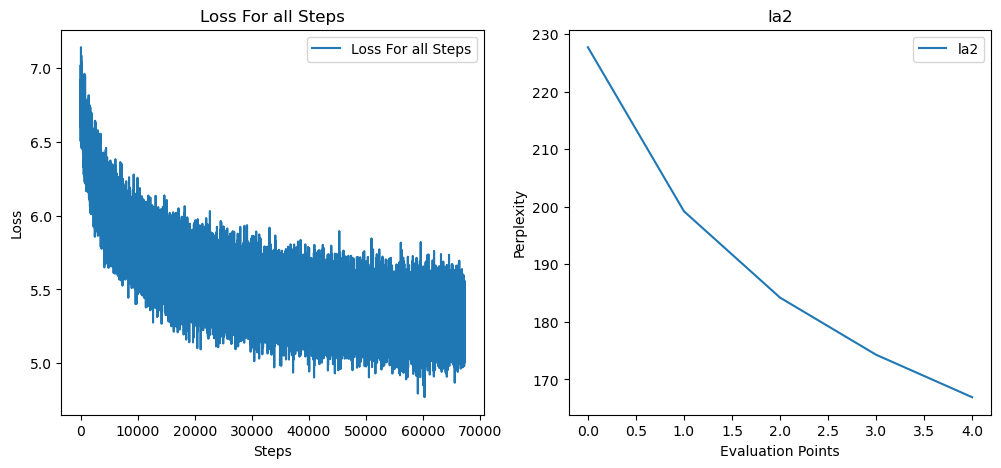

In [18]:
#Define the path in which the training data is 
path = pers_path_train
# Name of the folder the training data is in 
name = "pers_attention_standard_dropout_ep1_eval10000"

#reads all the stored data 
# losses :: a list of all the average loss over the epochs (if there was only one epoch trained 
# This list will only consist of one entry
# step_losses :: list of all losses step wise 
# perplexities :: perplexities epoch wise 
# all_perplex :: During training in a single epoch there where multiple evaluation points these are all the 
# mesured perplexities over all epochs see also the code below 
# model :: the final state of the model after training. 
losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)

steps_per_epoch = len(step_losses)/len(losses)
eval_per_epoch = len(all_perplex)/len(perplexities)
t = int(steps_per_epoch/((len(all_perplex)/len(losses))))
# Calculates an estimate of how much steps have been between single evaluations 
print("eval_every: ",t," evaluations per epoch: ",eval_per_epoch)



plot_two(step_losses[1000:],"Loss For all Steps",all_perplex[2:],"la2",axLabel1=("Steps","Loss"),axLabel2=("Evaluation Points","Perplexity"))

In [20]:
# The loaded Model can also be used do generate examples 
from src.model import generate_text
from transformers import  AutoTokenizer  #pipeline, GPT2LMHeadModel

# For persian the gpt2-persian is used 
tokenizer = AutoTokenizer.from_pretrained('bolbolzaban/gpt2-persian')

start_text = " من در راه"
for x in range(20):
    # Note that there is the Parameter is_attention which schould be true if the model is an AttentionModel 
    # and false otherwise
    generated_text = generate_text(model, tokenizer, start_text, device=device, context_length=20, is_attention = True)
    print(generated_text)

2024-12-15 17:07:43.889022: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-15 17:07:43.927555: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[CLS] من در راه[SEP] در بیمارستانهای علمی است محمدسعیدویکعظمی و خبرنگار رشت مسئول ارتباطات
[CLS] من در راه[SEP] تحقیقات اتهامی تبرئه نشده مطرح شده است و ابراز کرد. این بار یارانه یک
[CLS] من در راه[SEP] نبود از طرفی همچنان حضانت که نزدیکی قبرس هم خدمات نظارتی را وضع کرده 
[CLS] من در راه[SEP] احساس خاصی برای بیماران ما به کشورهای اسکاندیناوی گریه کنیم. بپرسیم بازار مثل قوانین
[CLS] من در راه[SEP] نیست. به قبل ثابت را در حال بافت طلای تر شده از۶
[CLS] من در راه[SEP] دقیقی است به دلیل تقدیس کمتر از طریق احتمال دارد که چگونهمان چنین خبری
[CLS] من در راه[SEP] برسیم. درست نیست و تاکنون بیش از۵ درصد کلی متقاضیان پایدار است؟
[CLS] من در راه[SEP]های جهان پهناور آسیامون کرد. آن از شب درگذشت. حالا خسته و
[CLS] من در راه[SEP] پاسخ کار دارم ادامه داد. او برای روی صحنه هم آماده باشکارهایشان
[CLS] من در راه[SEP] ماجرای در جمع سلام و چنان این جمله کتابی از معانی را خواند را
[CLS] من در راه[SEP]گه پلاستیکی وابستگی متافیزیکی داشته باشد و آخرین مالکیتمّا تلاش میکنم
[CLS] من در راه[SEP] علی قاسمی و مدرس 

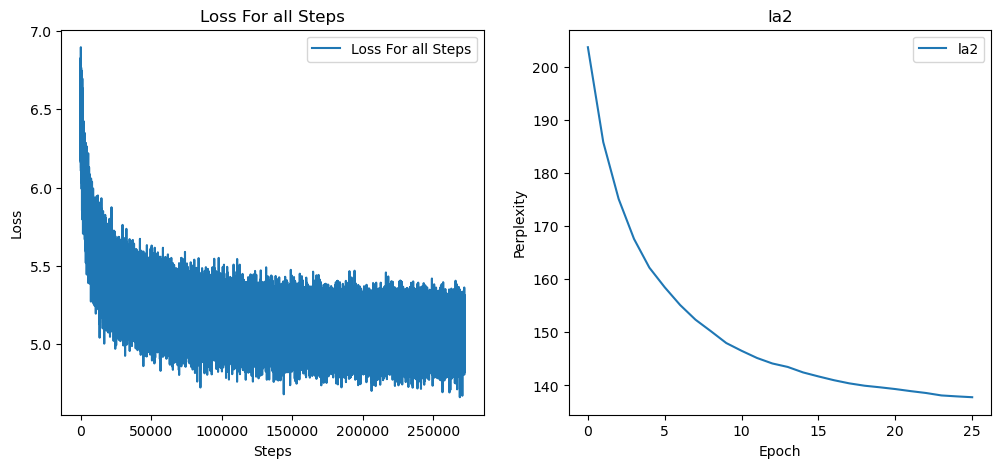

In [74]:

#Define the path in which the training data is 
path = pers_path_train
# Name of the folder the training data is in 
name = "pers_standardLinear_ep4"

losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
plot_two(step_losses[1000:],"Loss For all Steps",all_perplex[2:],"la2",axLabel1=("Steps","Loss"))

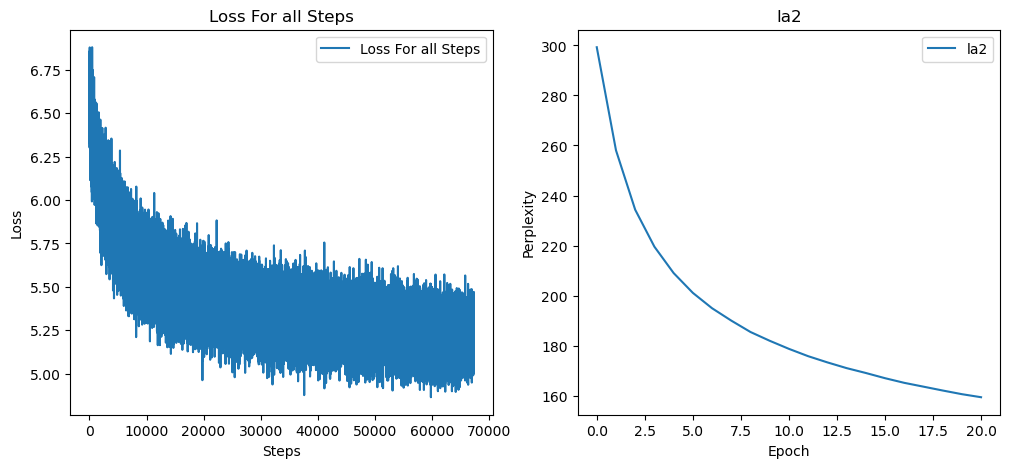

In [66]:
#Define the path in which the training data is 
path = span_path_train_lin
# Name of the folder the training data is in 
name = "pers_Linear_dropout_ep1"

losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
plot_two(step_losses[1000:],"Loss For all Steps",all_perplex[2:],"la2",axLabel1=("Steps","Loss"))

In [68]:
# The loaded Model can also be used do generate examples 
from src.model import generate_text
from transformers import  AutoTokenizer  #pipeline, GPT2LMHeadModel

tokenizer = AutoTokenizer.from_pretrained('bolbolzaban/gpt2-persian')

start_text = " من در راه"
for x in range(20):
    generated_text = generate_text(model, tokenizer, start_text, device=device, context_length=20)
    print(generated_text)

[CLS] من در راه[SEP]های رسانه خبر میداد. حالا حتی مصیبتان را در۴۲۰۰
[CLS] من در راه[SEP]۱۶۳۱۰ میلیون تومانی نداره اگر اوضاع آبادی عنوان پرکارترین تحریم
[CLS] من در راه[SEP] شده است. وی در شهرستان و پس به خانهها کمبودی که در
[CLS] من در راه[SEP] کشید و شریک شود نماینده ولی حدود۱۹ به سمتدر پیان را
[CLS] من در راه[SEP] عبور از خانه به روبی کنفدراسیون فوتبال محروم خواهند داشت که شجاع را نشان
[CLS] من در راه[SEP] به این مدیران با این رو توانسته های تفکر حضور داشتم. البته با
[CLS] من در راه[SEP] و آنگاه به شرایط نتیجه میدهد. شاخص تولید کند همواره نقض کردهاند.
[CLS] من در راه[SEP] و را به خوبی اصلی این سازمان جهاد کشاورزی گفت اما همیشه برای افزایش داد
[CLS] من در راه[SEP] بار در نیز تا طعمه گذاشته استجازهمردی یاز بلژیک بلاروس به
[CLS] من در راه[SEP] شروع به این راهبرد سیاسی شوند. تن از بیماری بود. اما ولی فقیه
[CLS] من در راه[SEP]های مکرر از دو این اتفاق افتاد و عنوان نظرات جشنواره فیلم برتر و فای
[CLS] من در راه[SEP] می زند. از استان ایلام از این و ها در جایگاه زندگی مردم
[CLS] من در راه[SEP

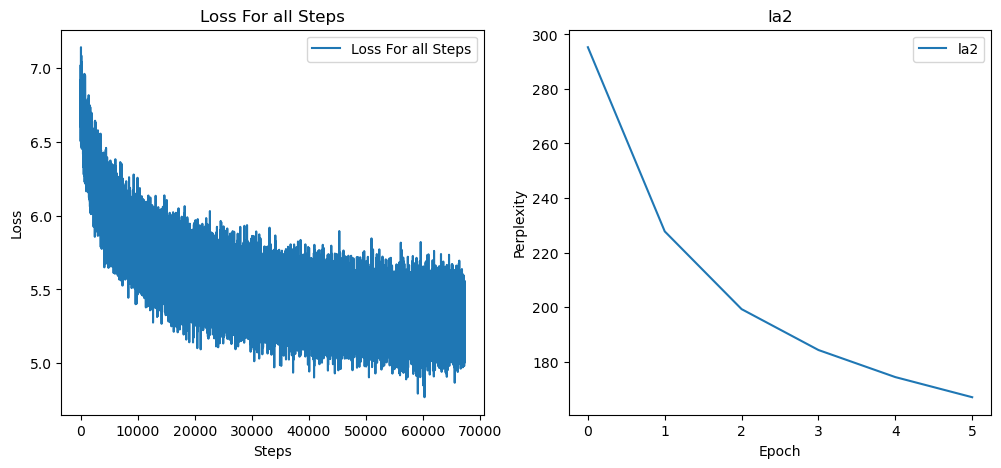

In [41]:
name = "pers_attention_standard_dropout_ep1_eval10000"
path = pers_path_train
losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
plot_two(step_losses[1000:],"Loss For all Steps",all_perplex[1:],"la2",axLabel1=("Steps","Loss"))

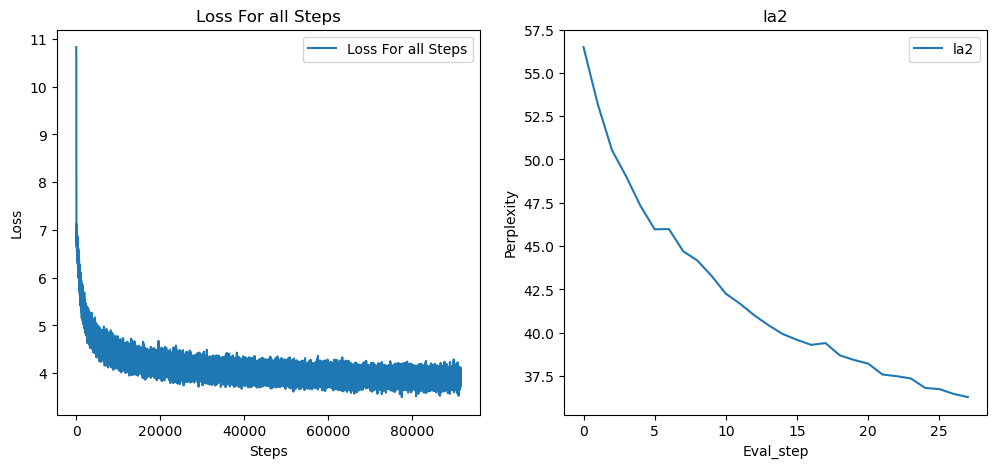

In [42]:
path = span_path_attent
name = "basic_att_ep3"
losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
plot_two(step_losses,"Loss For all Steps",all_perplex[5:],"la2",axLabel1=("Steps","Loss"),axLabel2=("Eval_step","Perplexity"))

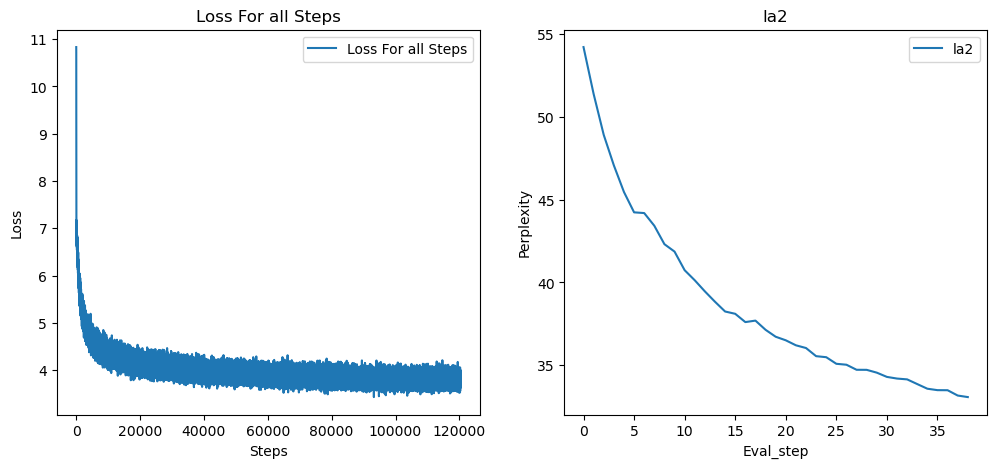

In [43]:
path = span_path_attent
name = "basic_att_preprocessingRemove"
losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
plot_two(step_losses,"Loss For all Steps",all_perplex[5:],"la2",axLabel1=("Steps","Loss"),axLabel2=("Eval_step","Perplexity"))

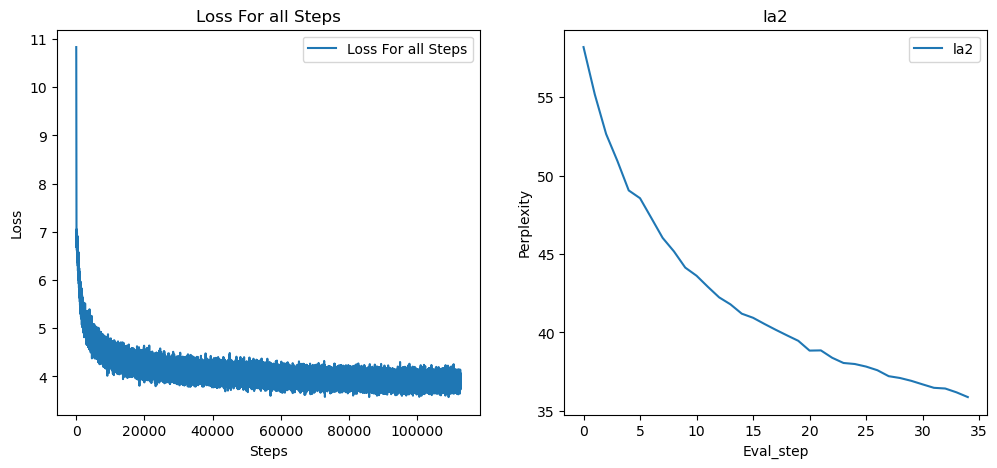

In [44]:
path = span_path_attent
name = "basic_att_preprocessingBoth"
losses, step_losses, perplexities,all_perplex,model = load_everything(path,name)
plot_two(step_losses,"Loss For all Steps",all_perplex[5:],"la2",axLabel1=("Steps","Loss"),axLabel2=("Eval_step","Perplexity"))

# Temp Cells can be deleted :) 

In [75]:
! tar --version 


tar (GNU tar) 1.30
Copyright (C) 2017 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <https://gnu.org/licenses/gpl.html>.
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.

Written by John Gilmore and Jay Fenlason.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [80]:
from src.helper import clean_text_spanish_both,clean_text_both,get_cleaned_spanish_text_as_string,clean_text_spanish_remove,get_lines_without_number,clean_spanish_text,get_cleaned_text
text_path = "content/spa_wikipedia_2021_30K-sentences.txt"

whole_text = get_lines_without_number(text_path)
whole_text1 = clean_spanish_text(whole_text)
whole_text2 = clean_text_spanish_remove(whole_text)
print(len(whole_text1))
print(len(whole_text2))

Total lines replaced 30000
Total lines not removed :  28494
30000
28494


In [84]:
w = get_cleaned_text(text_path,clean_text_spanish_both)
w = get_cleaned_text(text_path,clean_text_spanish_remove)

Total lines not removed :  28494
Total lines replaced 28494
Total lines not removed :  28494


In [74]:
text1  =  get_cleaned_text(text_path,clean_spanish_text)
text2  =  get_cleaned_text(text_path,clean_text_spanish_remove)
print(len(text1))
print(len(text2))

Total lines replaced 30000
Total lines not removed :  28494
3701778
3580198


In [78]:
raw_text1 = get_cleaned_spanish_text_as_string(text_path) #Standart 
raw_text2 = get_cleaned_text(text_path,clean_text_spanish_remove)
print(len(raw_text1)," ",len(raw_text2))

Total lines replaced 30000
Total lines not removed :  28494
3701778   3580198


In [41]:
for l in whole_text[40:80]:
    print(l)

A bordo, escondido de todos los demás pasajeros sólo sale de su camarote durante la noche.

Abrams inventó una enfermedad desconocida (y por lo tanto no tratada por los médicos) llamada «la sífilis bovina».

A buen seguro que la pose elegida fue deliberada, probablemente en aras de asociar la figura a tipología de la numismática romana clásica.

Abu Firas indica además que a Ibn Hamdan se le ofreció el gobierno de Fars, que rehusó, y que volvió a Bagdad.

Acaba "supuestamente" muerta cuando Haru la deja caer al vacío desde la parte más alta de la academia.

Acabó undécimo de la máxima categoría nacional de balonmano y consiguió firmar una temporada en la que el equipo renovado supo acoplarse a dificultad de esta categoría.

A cada lado del mismo hay dos puertas, una que da paso a las dependencias interiores y otra para subir al mencionado Camarín.

A cada monje se asignaba un trabajo determinado, que debía estar listo el sábado siguiente.

A cada una pertenecen los afiliados que reside

In [65]:
import re
r2 = r"[^0-9a-zA-Z\sáéíóúüñ]"
r3 = r"[^0-9a-zA-Z\sáéíóúüñ,“”.():'-»«]"
r = "d"
pattern = re.compile(r3)
if pattern.search('sdfds"'):
    print("Hallo")

Hallo


In [76]:
!tar -c -f newArchiv.zip *

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [11]:
from src.helper  import clean_pers_text_replace, get_cleaned_text,clean_pers_remove,clean_text_pers_both
text_path = "content/fas_news_2020_100K/fas_news_2020_100K-sentences.txt"
path_to_save_folder= "model/train_data_pers"

raw_text = get_cleaned_text(text_path,clean_pers_remove)
len(raw_text)

In:  100000  lines seperators replaced
Total lines not removed :  97334
Total lines replaced 39736
Total lines replaced 1561


11870040

In [13]:
raw_text = get_cleaned_text(text_path,clean_text_pers_both)
len(raw_text)

In:  100000  lines seperators replaced
Total lines not removed :  97334
Total lines replaced 39736
Total lines replaced 1561
In:  0  lines seperators replaced
Total lines replaced 92506
Total lines replaced 0
Total lines replaced 16


11718969